<a href="https://colab.research.google.com/github/ddesai-sjsu/Machine-Learning/blob/main/Homework_9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


  **Terms presence and frequency:** 
  is the simplest way of representing features and it is commonly used for Information Retrieval as well as for sentiment analysis.In term frequency, a term is given an integer value that represents its count in the document. TF–IDF weighting scheme can be applied to measure the importance of the term in the document.

  **Parts-of-Speech (PoS) tags:**
  are the labels or annotations that identify the word’s function in a given language. In general, words can be categorized into several parts of speech categories

  https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

  **Opinion words and phrases:**
  opinion words are words that are commonly used to express positive or negative sentiments 
* implement at least 2 of them in python:

  Done below
* scrape politifact as a team project:

  Done below




## **Web scraping from Polifact:**

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import urllib.request
import time

In [3]:
#Create lists to store the scraped data
authors = []
dates = []
statements = []
sources = []
targets = []

In [4]:
#Create a function to scrape the site
def scrape_website(page_number):
  page_num = str(page_number) #Convert the page number to a string
  URL = 'https://www.politifact.com/factchecks/list/?page='+page_num #append the page number to complete the URL
  webpage = requests.get(URL)  #Make a request to the website
  #time.sleep(3)
  soup = BeautifulSoup(webpage.text, "html.parser") #Parse the text from the website
  #Get the tags and it's class
  statement_footer =  soup.find_all('footer',attrs={'class':'m-statement__footer'})  #Get the tag and it's class
  statement_quote = soup.find_all('div', attrs={'class':'m-statement__quote'}) #Get the tag and it's class
  statement_meta = soup.find_all('div', attrs={'class':'m-statement__meta'})#Get the tag and it's class
  target = soup.find_all('div', attrs={'class':'m-statement__meter'}) #Get the tag and it's class
  #loop through the footer class m-statement__footer to get the date and author
  for i in statement_footer:
    link1 = i.text.strip()
    name_and_date = link1.split()
    first_name = name_and_date[1]
    last_name = name_and_date[2]
    full_name = first_name+' '+last_name
    month = name_and_date[4]
    day = name_and_date[5]
    year = name_and_date[6]
    date = month+' '+day+' '+year
    dates.append(date)
    authors.append(full_name)
  #Loop through the div m-statement__quote to get the link
  for i in statement_quote:
    link2 = i.find_all('a')
    statements.append(link2[0].text.strip())
 #Loop through the div m-statement__meta to get the source
  for i in statement_meta:
    link3 = i.find_all('a') #Source
    source_text = link3[0].text.strip()
    sources.append(source_text)
  #Loop through the target or the div m-statement__meter to get the facts about the statement (True or False)
  for i in target:
    fact = i.find('div', attrs={'class':'c-image'}).find('img').get('alt')
    targets.append(fact)

In [5]:
#Loop through 'n-1' webpages to scrape the data
n=50
for i in range(1, n):
  scrape_website(i)

In [6]:
#Create a new dataFrame 
data = pd.DataFrame(columns = ['author',  'statement', 'source', 'date', 'target']) 
data['author'] = authors
data['statement'] = statements
data['source'] = sources
data['date'] = dates
data['target'] = targets
#Show the data set

data.to_csv('politifact.csv', index=False)
data

,author,statement,source,date,target
0,Monique Curet,“500 National Guardsmen being called to Kenosh...,Facebook posts,"November 17, 2021",false
1,Jeff Cercone,A Kansas City tourism sign had a terrible typo.,Facebook posts,"November 17, 2021",false
2,Samantha Putterman,A new Facebook/Meta rule allows the company to...,Facebook posts,"November 17, 2021",pants-fire
3,Tom Kertscher,"Timothy Simpkins, a Black teen shooter, got 1 ...",Viral image,"November 17, 2021",half-true
4,Ciara O'Rourke,“Disturbing Pfizer ad tells kids they’ll get s...,Bloggers,"November 16, 2021",false
...,...,...,...,...,...
1465,Noah Y.,An image shows National Guard at the Capitol d...,Facebook posts,"• January 8,",barely-true
1466,Louis Jacobson,"""This election actually was not unusually close.""",Mitch McConnell,"January 8, 2021",true
1467,Daniel Funke,"32,000 votes for David Perdue “disappeared” du...",Facebook posts,"January 8, 2021",barely-true
1468,Amy Sherman,"“Last year, Pennsylvania elected officials pas...",Josh Hawley,"January 8, 2021",barely-true


## **Implementation of Microfactors:**


### **1. Term presence & frequency**

In [7]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [8]:
df=data
df['statement']=df['statement'].astype(str)
df['Lower']=df['statement'].str.lower()
df['Lower']=df['Lower'].str.replace('\d+', '')
df['Lower']=df['Lower'].str.replace(r"http\S+", '')
df['Lower']=df['Lower'].str.replace('[^A-Za-z0-9 ]+', '')
df

,author,statement,source,date,target,Lower
0,Monique Curet,“500 National Guardsmen being called to Kenosh...,Facebook posts,"November 17, 2021",false,national guardsmen being called to kenosha ah...
1,Jeff Cercone,A Kansas City tourism sign had a terrible typo.,Facebook posts,"November 17, 2021",false,a kansas city tourism sign had a terrible typo
2,Samantha Putterman,A new Facebook/Meta rule allows the company to...,Facebook posts,"November 17, 2021",pants-fire,a new facebookmeta rule allows the company to ...
3,Tom Kertscher,"Timothy Simpkins, a Black teen shooter, got 1 ...",Viral image,"November 17, 2021",half-true,timothy simpkins a black teen shooter got day...
4,Ciara O'Rourke,“Disturbing Pfizer ad tells kids they’ll get s...,Bloggers,"November 16, 2021",false,disturbing pfizer ad tells kids theyll get sup...
...,...,...,...,...,...,...
1465,Noah Y.,An image shows National Guard at the Capitol d...,Facebook posts,"• January 8,",barely-true,an image shows national guard at the capitol d...
1466,Louis Jacobson,"""This election actually was not unusually close.""",Mitch McConnell,"January 8, 2021",true,this election actually was not unusually close
1467,Daniel Funke,"32,000 votes for David Perdue “disappeared” du...",Facebook posts,"January 8, 2021",barely-true,votes for david perdue disappeared during the...
1468,Amy Sherman,"“Last year, Pennsylvania elected officials pas...",Josh Hawley,"January 8, 2021",barely-true,last year pennsylvania elected officials passe...


In [9]:
stop_words = set(stopwords.words('english')) 
df['statement_without_stopwords'] = df['Lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df

,author,statement,source,date,target,Lower,statement_without_stopwords
0,Monique Curet,“500 National Guardsmen being called to Kenosh...,Facebook posts,"November 17, 2021",false,national guardsmen being called to kenosha ah...,national guardsmen called kenosha ahead ritten...
1,Jeff Cercone,A Kansas City tourism sign had a terrible typo.,Facebook posts,"November 17, 2021",false,a kansas city tourism sign had a terrible typo,kansas city tourism sign terrible typo
2,Samantha Putterman,A new Facebook/Meta rule allows the company to...,Facebook posts,"November 17, 2021",pants-fire,a new facebookmeta rule allows the company to ...,new facebookmeta rule allows company use peopl...
3,Tom Kertscher,"Timothy Simpkins, a Black teen shooter, got 1 ...",Viral image,"November 17, 2021",half-true,timothy simpkins a black teen shooter got day...,timothy simpkins black teen shooter got day ja...
4,Ciara O'Rourke,“Disturbing Pfizer ad tells kids they’ll get s...,Bloggers,"November 16, 2021",false,disturbing pfizer ad tells kids theyll get sup...,disturbing pfizer ad tells kids theyll get sup...
...,...,...,...,...,...,...,...
1465,Noah Y.,An image shows National Guard at the Capitol d...,Facebook posts,"• January 8,",barely-true,an image shows national guard at the capitol d...,image shows national guard capitol black lives...
1466,Louis Jacobson,"""This election actually was not unusually close.""",Mitch McConnell,"January 8, 2021",true,this election actually was not unusually close,election actually unusually close
1467,Daniel Funke,"32,000 votes for David Perdue “disappeared” du...",Facebook posts,"January 8, 2021",barely-true,votes for david perdue disappeared during the...,votes david perdue disappeared georgia senate ...
1468,Amy Sherman,"“Last year, Pennsylvania elected officials pas...",Josh Hawley,"January 8, 2021",barely-true,last year pennsylvania elected officials passe...,last year pennsylvania elected officials passe...


In [10]:

# Use English stemmer.
stemmer = SnowballStemmer("english")
lem=WordNetLemmatizer()
df['lemm'] = df['statement_without_stopwords'].apply(lambda x: ' '.join([lem.lemmatize(y) for y in x.split()]))
df['stemmed'] = df['lemm'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x.split()]))
df

,author,statement,source,date,target,Lower,statement_without_stopwords,lemm,stemmed
0,Monique Curet,“500 National Guardsmen being called to Kenosh...,Facebook posts,"November 17, 2021",false,national guardsmen being called to kenosha ah...,national guardsmen called kenosha ahead ritten...,national guardsman called kenosha ahead ritten...,nation guardsman call kenosha ahead rittenhous...
1,Jeff Cercone,A Kansas City tourism sign had a terrible typo.,Facebook posts,"November 17, 2021",false,a kansas city tourism sign had a terrible typo,kansas city tourism sign terrible typo,kansa city tourism sign terrible typo,kansa citi tourism sign terribl typo
2,Samantha Putterman,A new Facebook/Meta rule allows the company to...,Facebook posts,"November 17, 2021",pants-fire,a new facebookmeta rule allows the company to ...,new facebookmeta rule allows company use peopl...,new facebookmeta rule allows company use peopl...,new facebookmeta rule allow compani use peopl ...
3,Tom Kertscher,"Timothy Simpkins, a Black teen shooter, got 1 ...",Viral image,"November 17, 2021",half-true,timothy simpkins a black teen shooter got day...,timothy simpkins black teen shooter got day ja...,timothy simpkins black teen shooter got day ja...,timothi simpkin black teen shooter got day jai...
4,Ciara O'Rourke,“Disturbing Pfizer ad tells kids they’ll get s...,Bloggers,"November 16, 2021",false,disturbing pfizer ad tells kids theyll get sup...,disturbing pfizer ad tells kids theyll get sup...,disturbing pfizer ad tell kid theyll get super...,disturb pfizer ad tell kid theyll get superpow...
...,...,...,...,...,...,...,...,...,...
1465,Noah Y.,An image shows National Guard at the Capitol d...,Facebook posts,"• January 8,",barely-true,an image shows national guard at the capitol d...,image shows national guard capitol black lives...,image show national guard capitol black life m...,imag show nation guard capitol black life matt...
1466,Louis Jacobson,"""This election actually was not unusually close.""",Mitch McConnell,"January 8, 2021",true,this election actually was not unusually close,election actually unusually close,election actually unusually close,elect actual unusu close
1467,Daniel Funke,"32,000 votes for David Perdue “disappeared” du...",Facebook posts,"January 8, 2021",barely-true,votes for david perdue disappeared during the...,votes david perdue disappeared georgia senate ...,vote david perdue disappeared georgia senate r...,vote david perdu disappear georgia senat runof...
1468,Amy Sherman,"“Last year, Pennsylvania elected officials pas...",Josh Hawley,"January 8, 2021",barely-true,last year pennsylvania elected officials passe...,last year pennsylvania elected officials passe...,last year pennsylvania elected official passed...,last year pennsylvania elect offici pass whole...


In [11]:
df_final=df[['stemmed','target']]
df_final=df_final.rename(columns={'stemmed': "PreProcessed Statement"})
df_final

,PreProcessed Statement,target
0,nation guardsman call kenosha ahead rittenhous...,false
1,kansa citi tourism sign terribl typo,false
2,new facebookmeta rule allow compani use peopl ...,pants-fire
3,timothi simpkin black teen shooter got day jai...,half-true
4,disturb pfizer ad tell kid theyll get superpow...,false
...,...,...
1465,imag show nation guard capitol black life matt...,barely-true
1466,elect actual unusu close,true
1467,vote david perdu disappear georgia senat runof...,barely-true
1468,last year pennsylvania elect offici pass whole...,barely-true


In [12]:

tfidf_vect = TfidfVectorizer(max_features=300)
tfidf = tfidf_vect.fit_transform(df_final['PreProcessed Statement'].values)
tfidf

<1470x300 sparse matrix of type '<class 'numpy.float64'>'
	with 6923 stored elements in Compressed Sparse Row format>

### **2. Parts of Speech(PoS) tags**

In [13]:
from collections import Counter
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [14]:
def get_POS_tags(statement):
  tokens = nltk.word_tokenize(statement)
  text = nltk.Text(tokens)
  tags = nltk.pos_tag(text)
  counts = Counter(tag for word,tag in tags)
  noun_counts=counts['NN']+counts['NNS']+counts['NNP']+counts['NNPS']
  verb_counts=counts['VB']+counts['VBD']+counts['VBG']+counts['VBN']+counts['VBP']+counts['VBG']
  return noun_counts,verb_counts

In [15]:
df_final['noun_counts']=df_final['PreProcessed Statement'].apply(lambda x:get_POS_tags(x)[0])

In [16]:
df_final['verb_counts']=df_final['PreProcessed Statement'].apply(lambda x:get_POS_tags(x)[1])

In [17]:
df_final

,PreProcessed Statement,target,noun_counts,verb_counts
0,nation guardsman call kenosha ahead rittenhous...,false,8,1
1,kansa citi tourism sign terribl typo,false,5,0
2,new facebookmeta rule allow compani use peopl ...,pants-fire,9,0
3,timothi simpkin black teen shooter got day jai...,half-true,15,2
4,disturb pfizer ad tell kid theyll get superpow...,false,6,2
...,...,...,...,...
1465,imag show nation guard capitol black life matt...,barely-true,8,0
1466,elect actual unusu close,true,2,0
1467,vote david perdu disappear georgia senat runof...,barely-true,7,1
1468,last year pennsylvania elect offici pass whole...,barely-true,10,3


In [21]:
def getTarget(statement):
  if 'true' in statement :
    return 1
  return 0

In [22]:
df_final['sentiment']=df_final['target'].apply(lambda x: getTarget(x))

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=300)
tfidf = tfidf_vect.fit_transform(df_final['PreProcessed Statement'].values)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
trainX, testX = train_test_split(tfidf, test_size=0.30, random_state=1)
trainY, testY = train_test_split(df_final['sentiment'], test_size=0.30, random_state=1)
trainX

<1029x300 sparse matrix of type '<class 'numpy.float64'>'
	with 4874 stored elements in Compressed Sparse Row format>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression

In [27]:

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA","LinearRegression"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearRegression()
    ]

In [31]:

# TODO (Apply): All cross-validation
from time import time
import pickle
max_score = 0.0
max_class = ''
# iterate over classifiers


for name, clf in zip(names, classifiers):
    start_time = time()
    clf.fit(trainX.toarray(), trainY)
    pickle.dump(clf,open(name, 'wb'))
    score = 100.0 * clf.score(testX.toarray(), testY)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Classifier = Nearest Neighbors, Score (test, accuracy) = 62.36, Training time = 0.05 seconds
Classifier = Linear SVM, Score (test, accuracy) = 62.13, Training time = 0.17 seconds
Classifier = RBF SVM, Score (test, accuracy) = 64.40, Training time = 0.29 seconds
Classifier = Decision Tree, Score (test, accuracy) = 61.68, Training time = 0.01 seconds
Classifier = Random Forest, Score (test, accuracy) = 62.13, Training time = 0.03 seconds
Classifier = Neural Net, Score (test, accuracy) = 65.99, Training time = 2.69 seconds
Classifier = AdaBoost, Score (test, accuracy) = 65.76, Training time = 0.34 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 61.22, Training time = 0.01 seconds
Classifier = QDA, Score (test, accuracy) = 65.53, Training time = 0.12 seconds
Classifier = LinearRegression, Score (test, accuracy) = -15.11, Training time = 0.08 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Neural Net, Score (test, acc

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [33]:
clf=pickle.load(open('/content/Neural Net', 'rb'))

In [37]:
clf.predict(tfidf[0])

array([1])

# Stream New News using google news rss feed

In [107]:
!pip install feedparser

In [108]:
import feedparser

def parseRSS( rss_url ):
    return feedparser.parse( rss_url )

def getHeadlines(rss_url):
    headlines = []

    feed = parseRSS(rss_url)
    for newsitem in feed['items']:
        headlines.append(newsitem['title'])

    return headlines



allheadlines = []


newsurls = {

    'googlenews': 'https://news.google.com/news/rss/?hl=en&amp;ned=us&amp;gl=US',

}


for key, url in newsurls.items():
    
    allheadlines.extend(getHeadlines(url))


for hl in allheadlines:
    print(hl)

'Piece of theater': Legal experts weigh in on Kyle Rittenhouse’s seating jurors deciding his fate by lottery - NBC News
2 Men Convicted in Assassination of Malcolm X Will Be Exonerated - The New York Times
'QAnon Shaman' Jacob Chansley sentenced to 41 months in prison for role in US Capitol riot - CNN
Defense for three men in Ahmaud Arbery murder trial claim they acted in self-defense - Daily Mail
Administration to invest billions in vaccine manufacturing to increase supply for poor nations - The Washington Post
UC lecturers avert strike; classes will not be canceled - Los Angeles Times
House begins debate on vote to censure Paul Gosar over violent video aimed at AOC and Biden – live - The Guardian
Drug overdose deaths top 100,000 annually for the first time, driven by fentanyl, CDC data show - CNN
Catholic Bishops Avoid Confrontation With Biden Over Communion - The New York Times
Physician resigns from Houston Methodist after hospital accused her of spreading 'misinformation': COVID-1

In [109]:
import pandas as pd
df = pd.DataFrame(allheadlines)

In [110]:
df.columns=['statement']

New Fetched news from google news rss feeds

In [111]:
df

,statement
0,'Piece of theater': Legal experts weigh in on ...
1,2 Men Convicted in Assassination of Malcolm X ...
2,'QAnon Shaman' Jacob Chansley sentenced to 41 ...
3,Defense for three men in Ahmaud Arbery murder ...
4,Administration to invest billions in vaccine m...
5,UC lecturers avert strike; classes will not be...
6,House begins debate on vote to censure Paul Go...
7,"Drug overdose deaths top 100,000 annually for ..."
8,Catholic Bishops Avoid Confrontation With Bide...
9,Physician resigns from Houston Methodist after...


In [112]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [113]:

df['statement']=df['statement'].astype(str)
df['Lower']=df['statement'].str.lower()
df['Lower']=df['Lower'].str.replace('\d+', '')
df['Lower']=df['Lower'].str.replace(r"http\S+", '')
df['Lower']=df['Lower'].str.replace('[^A-Za-z0-9 ]+', '')
df

,statement,Lower
0,'Piece of theater': Legal experts weigh in on ...,piece of theater legal experts weigh in on kyl...
1,2 Men Convicted in Assassination of Malcolm X ...,men convicted in assassination of malcolm x w...
2,'QAnon Shaman' Jacob Chansley sentenced to 41 ...,qanon shaman jacob chansley sentenced to mont...
3,Defense for three men in Ahmaud Arbery murder ...,defense for three men in ahmaud arbery murder ...
4,Administration to invest billions in vaccine m...,administration to invest billions in vaccine m...
5,UC lecturers avert strike; classes will not be...,uc lecturers avert strike classes will not be ...
6,House begins debate on vote to censure Paul Go...,house begins debate on vote to censure paul go...
7,"Drug overdose deaths top 100,000 annually for ...",drug overdose deaths top annually for the fir...
8,Catholic Bishops Avoid Confrontation With Bide...,catholic bishops avoid confrontation with bide...
9,Physician resigns from Houston Methodist after...,physician resigns from houston methodist after...


In [114]:
stop_words = set(stopwords.words('english')) 
df['statement_without_stopwords'] = df['Lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df

,statement,Lower,statement_without_stopwords
0,'Piece of theater': Legal experts weigh in on ...,piece of theater legal experts weigh in on kyl...,piece theater legal experts weigh kyle rittenh...
1,2 Men Convicted in Assassination of Malcolm X ...,men convicted in assassination of malcolm x w...,men convicted assassination malcolm x exonerat...
2,'QAnon Shaman' Jacob Chansley sentenced to 41 ...,qanon shaman jacob chansley sentenced to mont...,qanon shaman jacob chansley sentenced months p...
3,Defense for three men in Ahmaud Arbery murder ...,defense for three men in ahmaud arbery murder ...,defense three men ahmaud arbery murder trial c...
4,Administration to invest billions in vaccine m...,administration to invest billions in vaccine m...,administration invest billions vaccine manufac...
5,UC lecturers avert strike; classes will not be...,uc lecturers avert strike classes will not be ...,uc lecturers avert strike classes canceled los...
6,House begins debate on vote to censure Paul Go...,house begins debate on vote to censure paul go...,house begins debate vote censure paul gosar vi...
7,"Drug overdose deaths top 100,000 annually for ...",drug overdose deaths top annually for the fir...,drug overdose deaths top annually first time d...
8,Catholic Bishops Avoid Confrontation With Bide...,catholic bishops avoid confrontation with bide...,catholic bishops avoid confrontation biden com...
9,Physician resigns from Houston Methodist after...,physician resigns from houston methodist after...,physician resigns houston methodist hospital a...


In [94]:

# Use English stemmer.
stemmer = SnowballStemmer("english")
lem=WordNetLemmatizer()
df['lemm'] = df['statement_without_stopwords'].apply(lambda x: ' '.join([lem.lemmatize(y) for y in x.split()]))
df['stemmed'] = df['lemm'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x.split()]))
df

,statement,Lower,statement_without_stopwords,lemm,stemmed
0,'Piece of theater': Legal experts weigh in on ...,piece of theater legal experts weigh in on kyl...,piece theater legal experts weigh kyle rittenh...,piece theater legal expert weigh kyle rittenho...,piec theater legal expert weigh kyle rittenhou...
1,2 Men Convicted in Assassination of Malcolm X ...,men convicted in assassination of malcolm x w...,men convicted assassination malcolm x exonerat...,men convicted assassination malcolm x exonerat...,men convict assassin malcolm x exoner new york...
2,'QAnon Shaman' Jacob Chansley sentenced to 41 ...,qanon shaman jacob chansley sentenced to mont...,qanon shaman jacob chansley sentenced months p...,qanon shaman jacob chansley sentenced month pr...,qanon shaman jacob chansley sentenc month pris...
3,Defense for three men in Ahmaud Arbery murder ...,defense for three men in ahmaud arbery murder ...,defense three men ahmaud arbery murder trial c...,defense three men ahmaud arbery murder trial c...,defens three men ahmaud arberi murder trial cl...
4,Administration to invest billions in vaccine m...,administration to invest billions in vaccine m...,administration invest billions vaccine manufac...,administration invest billion vaccine manufact...,administr invest billion vaccin manufactur inc...
5,UC lecturers avert strike; classes will not be...,uc lecturers avert strike classes will not be ...,uc lecturers avert strike classes canceled los...,uc lecturer avert strike class canceled los an...,uc lectur avert strike class cancel los angel ...
6,House begins debate on vote to censure Paul Go...,house begins debate on vote to censure paul go...,house begins debate vote censure paul gosar vi...,house begin debate vote censure paul gosar vio...,hous begin debat vote censur paul gosar violen...
7,"Drug overdose deaths top 100,000 annually for ...",drug overdose deaths top annually for the fir...,drug overdose deaths top annually first time d...,drug overdose death top annually first time dr...,drug overdos death top annual first time drive...
8,Catholic Bishops Avoid Confrontation With Bide...,catholic bishops avoid confrontation with bide...,catholic bishops avoid confrontation biden com...,catholic bishop avoid confrontation biden comm...,cathol bishop avoid confront biden communion n...
9,Physician resigns from Houston Methodist after...,physician resigns from houston methodist after...,physician resigns houston methodist hospital a...,physician resigns houston methodist hospital a...,physician resign houston methodist hospit accu...


In [95]:
df_final=df[['stemmed']]
df_final=df_final.rename(columns={'stemmed': "PreProcessed Statement"})
df_final

,PreProcessed Statement
0,piec theater legal expert weigh kyle rittenhou...
1,men convict assassin malcolm x exoner new york...
2,qanon shaman jacob chansley sentenc month pris...
3,defens three men ahmaud arberi murder trial cl...
4,administr invest billion vaccin manufactur inc...
5,uc lectur avert strike class cancel los angel ...
6,hous begin debat vote censur paul gosar violen...
7,drug overdos death top annual first time drive...
8,cathol bishop avoid confront biden communion n...
9,physician resign houston methodist hospit accu...


In [96]:

tfidf_vect = TfidfVectorizer(max_features=300)
tfidf = tfidf_vect.fit_transform(df_final['PreProcessed Statement'].values)
tfidf

<38x300 sparse matrix of type '<class 'numpy.float64'>'
	with 352 stored elements in Compressed Sparse Row format>

In [97]:
from collections import Counter
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [98]:
def get_POS_tags(statement):
  tokens = nltk.word_tokenize(statement)
  text = nltk.Text(tokens)
  tags = nltk.pos_tag(text)
  counts = Counter(tag for word,tag in tags)
  noun_counts=counts['NN']+counts['NNS']+counts['NNP']+counts['NNPS']
  verb_counts=counts['VB']+counts['VBD']+counts['VBG']+counts['VBN']+counts['VBP']+counts['VBG']
  return noun_counts,verb_counts

In [99]:
df_final['noun_counts']=df_final['PreProcessed Statement'].apply(lambda x:get_POS_tags(x)[0])

In [100]:
df_final['verb_counts']=df_final['PreProcessed Statement'].apply(lambda x:get_POS_tags(x)[1])

In [101]:
df_final

,PreProcessed Statement,noun_counts,verb_counts
0,piec theater legal expert weigh kyle rittenhou...,10,0
1,men convict assassin malcolm x exoner new york...,6,1
2,qanon shaman jacob chansley sentenc month pris...,10,0
3,defens three men ahmaud arberi murder trial cl...,7,1
4,administr invest billion vaccin manufactur inc...,5,1
5,uc lectur avert strike class cancel los angel ...,7,0
6,hous begin debat vote censur paul gosar violen...,10,0
7,drug overdos death top annual first time drive...,6,3
8,cathol bishop avoid confront biden communion n...,6,1
9,physician resign houston methodist hospit accu...,10,0


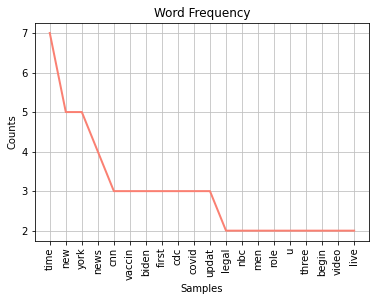

In [102]:
all_words=[]        
for i in range(len(df)):
    all_words = all_words + df_final['PreProcessed Statement'][i].split()
#Get word frequency        
nlp_words = nltk.FreqDist(all_words)
plot1 = nlp_words.plot(20, color='salmon', title='Word Frequency')

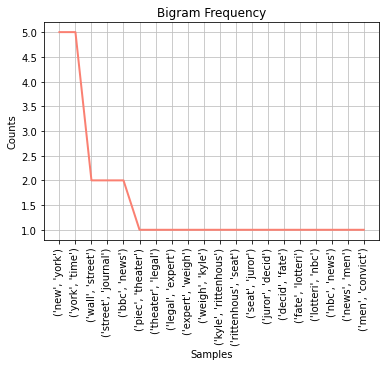

In [103]:
bigrm = list(nltk.bigrams(all_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

In [104]:
from textblob import TextBlob

In [105]:
df_final

,PreProcessed Statement,noun_counts,verb_counts
0,piec theater legal expert weigh kyle rittenhou...,10,0
1,men convict assassin malcolm x exoner new york...,6,1
2,qanon shaman jacob chansley sentenc month pris...,10,0
3,defens three men ahmaud arberi murder trial cl...,7,1
4,administr invest billion vaccin manufactur inc...,5,1
5,uc lectur avert strike class cancel los angel ...,7,0
6,hous begin debat vote censur paul gosar violen...,10,0
7,drug overdos death top annual first time drive...,6,3
8,cathol bishop avoid confront biden communion n...,6,1
9,physician resign houston methodist hospit accu...,10,0


In [106]:
df_final['PreProcessed Statement'] = [str(thing) for thing in df_final['PreProcessed Statement']]
sentiment = []
for i in range(len(df)):
    blob = TextBlob(df_final['PreProcessed Statement'][i])
    for sentence in blob.sentences:
        sentiment.append(sentence.sentiment.polarity)
df_final['sentiment_score']=sentiment


# After the processing we can see the Sentiment Score in the last column which is for the stream of new news data

In [85]:
df_final.head(37)

,PreProcessed Statement,noun_counts,verb_counts,sentiment_score
0,motion mistrial still loom juri deliber kyle r...,7,1,0.000000
1,men convict assassin malcolm x exoner new york...,6,1,0.136364
2,qanon shaman jacob chansley sentenc month pris...,10,0,0.000000
3,uc lectur avert strike class cancel los angel ...,7,0,0.000000
4,administr invest billion vaccin manufactur inc...,5,1,-0.400000
5,offici warn flood near uscanada border pump st...,7,1,-0.200000
6,hous pois censur gosar eject committe violent ...,9,1,-0.800000
7,biden new record high u overdos death cannot o...,4,1,0.148182
8,cathol bishop approv new guidanc communion pro...,7,0,0.211039
9,texa doctor resign suspens spread danger misin...,7,0,0.000000
